<a href="https://colab.research.google.com/github/allenwipf/fastai/blob/main/bears.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastai
!pip install fastbook

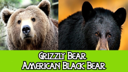

In [ ]:
from fastbook import *
from fastai.vision.widgets import *

results = search_images_ddg('grizzly bear')

dest = 'images/grizzly.jpg'
download_url(results[random.randint(0, 199)], dest)    

im = Image.open(dest)
im.to_thumb(128,128)

In [ ]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [ ]:
if not path.exists():
    path.mkdir()
for o in bear_types:
    dest = (path/o)
    print(dest)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{o} bear')
    download_images(dest, urls=results)

bears/black
bears/teddy


In [ ]:
fns = get_image_files(path)
fns

(#706) [Path('bears/teddy/c8601dea-7fe0-41fc-b3a3-2562e024b1a5.jpg'),Path('bears/teddy/16eb532f-526d-4526-9cf5-ef5284f6d96c.jpg'),Path('bears/teddy/1fff53bd-ef4d-4084-8f44-1e7dcb4d3500.jpg'),Path('bears/teddy/c4a0e6aa-1cf7-47eb-bde5-8c95d631b6d2.jpg'),Path('bears/teddy/4e69b2af-9261-4f16-8b01-79a409a672b7.jpg'),Path('bears/teddy/f6d3f98a-8cff-443f-a81d-3a60c54302e4.jpg'),Path('bears/teddy/f07e5bb1-49ca-4aec-a963-2b701c374a49.JPG'),Path('bears/teddy/890a605e-e409-440f-9e97-3bdf2877c831.jpg'),Path('bears/teddy/129e026c-30a7-4b7d-b839-46169ee6a949.jpg'),Path('bears/teddy/54e87e75-1a61-4c50-a2cd-4728958d3aed.jpg')...]

In [ ]:
failed = verify_images(fns)
print(failed)
failed.map(Path.unlink)

[Path('bears/teddy/16eb532f-526d-4526-9cf5-ef5284f6d96c.jpg'), Path('bears/teddy/129e026c-30a7-4b7d-b839-46169ee6a949.jpg'), Path('bears/teddy/6f0c2083-2e19-4fcf-bfd5-acaec92be8b9.JPG'), Path('bears/teddy/99cbb00a-ce01-4bad-916d-73f2a71ca6a1.jpg'), Path('bears/teddy/d555921e-de65-4ba7-aa45-417d61700a93.png'), Path('bears/teddy/451461ea-da04-448f-8d89-63bf8c9e5e5f.JPG'), Path('bears/teddy/043abf77-b0ab-4924-9887-21ed2a3e0d43.JPG'), Path('bears/teddy/83d7469b-b177-4eca-9850-ea9c0fa67b23.JPG'), Path('bears/teddy/6a84bcb4-fa10-4c9c-b459-075eada2518d.jpg'), Path('bears/teddy/39239739-2c9b-4832-931d-1f1474ed60cf.JPG'), Path('bears/teddy/a5f20a1e-61d6-4473-8db7-c91458568385.jpg'), Path('bears/teddy/0f2ce050-ffab-4f25-b36e-2c59c62a2a07.jpg'), Path('bears/teddy/4c79af9d-49b6-4776-bafc-f5482c5476ad.JPG'), Path('bears/teddy/09e10938-1723-4435-b44c-4aacd81873bf.jpg'), Path('bears/teddy/5fd78ca2-5fd7-4181-95c0-3c3aefc0ebe4.JPG'), Path('bears/black/80d56709-489d-41f4-8c3a-f295cf8b9eae.jpg'), Path('b

(#24) [None,None,None,None,None,None,None,None,None,None...]

In [ ]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

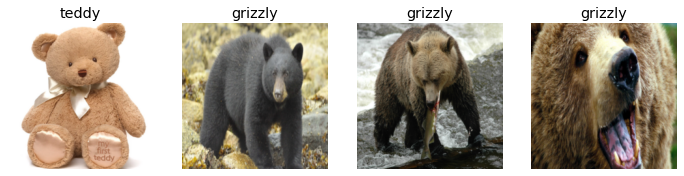

In [ ]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

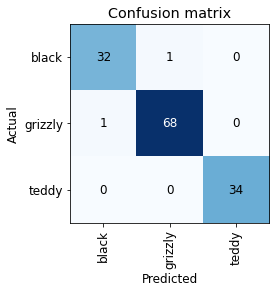

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

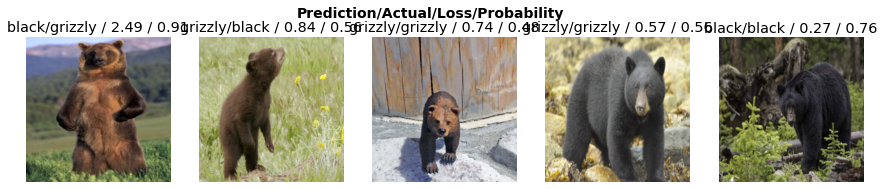

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')


(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
print(learn_inf.predict('images/grizzly.jpg'))
print(learn_inf.dls.vocab)

('grizzly', TensorBase(1), TensorBase([0.0939, 0.8995, 0.0066]))
['black', 'grizzly', 'teddy']


In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: black; Probability: 0.8395')

In [ ]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
#hide_output
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
!pip install voila

In [ ]:
!jupyter serverextension enable --sys-prefix voila

Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
      voila 0.4.0 OK
